Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []
      Unnamed: 0  track_number  acousticness  danceability  energy  \
0              0             1        0.0824         0.463   0.993   
1              1             2        0.4370         0.326   0.965   
2              2             3        0.4160         0.386   0.969   
3              3             4        0.5670         0.369   0.985   
4              4             5        0.4000         0.303   0.969   
...          ...           ...           ...           ...     ...   
1605        1605             8        0.1570         0.466   0.932   
1606        1606             9        0.0576         0.509   0.706   
1607        1607            10        0.3710         0.790   0.774   
1608        1608            11        0.2170         0.700   0.546   
1609

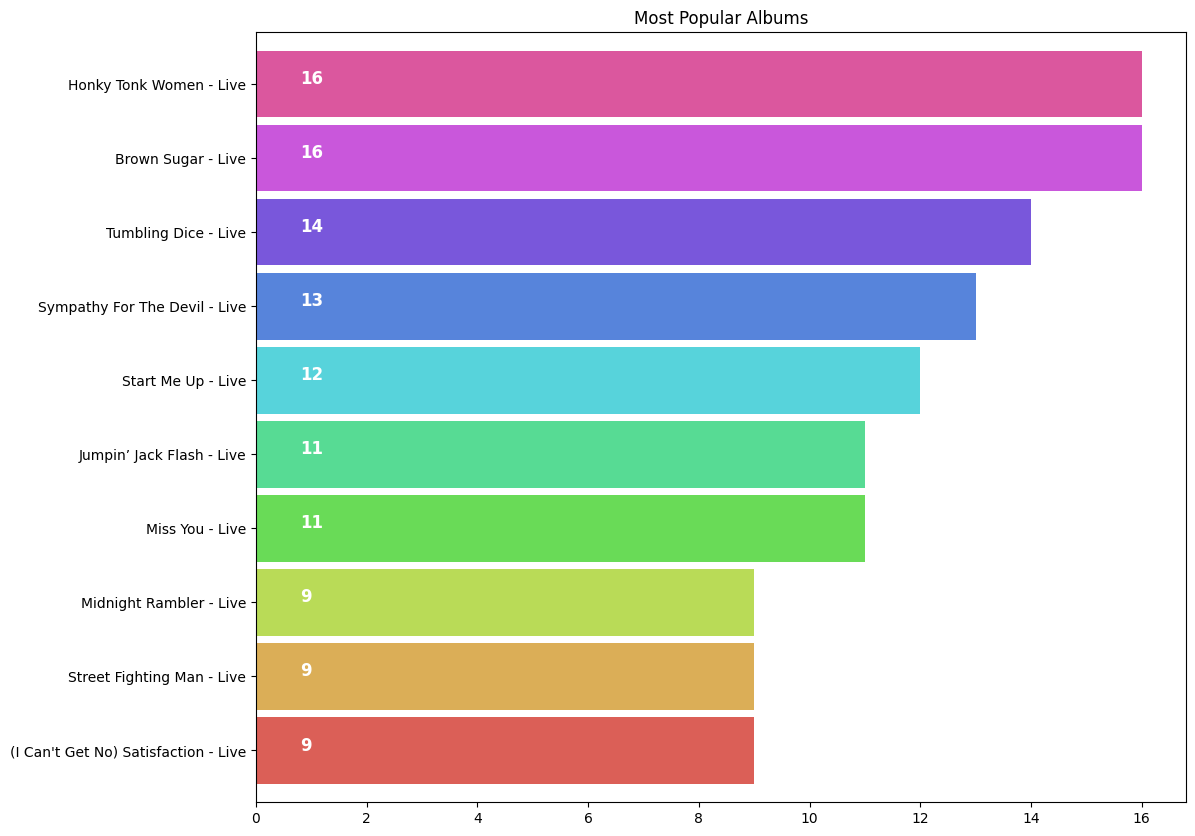

In [ ]:
'''number 1.a) Examine the data initially to identify duplicates, missing values, irrelevant
entries, or outliers. Check for any instances of erroneous entries and
rectify them as needed.
2. Refine the data for further processing based on your findings '''

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
from scipy import stats
from google.colab import drive
import io
from google.colab import files

#drive.mount('/content/drive/')
path='/content/drive/MyDrive/colab_notebooks/rolling_stones_spotify.csv'

data = pd.read_csv(path)


data.head()
data.isnull().sum()

df = pd.DataFrame(data)

data.dropna(inplace=True)
data.isnull().sum()
df.isna().sum()
duplicates = df.duplicated(keep=False)  # keep=False marks all duplicates as True

# Print duplicate rows
print(df[duplicates])

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Print the numerical columns
print(numerical_df)

#get outliers for each column
numerical_df.columns

# Print the numerical columns
print('Numerical columns')
print(numerical_df)

#get number of columns and calculate outliers for each column
len(df.columns)
#df takes 0 as the numeric values before the actual columns, first column is 1
df.iloc[:, 1]

#print highest and lowest allowed values and put these values in remove outliers section
for col in numerical_df:
 highest_allowed= df[col].mean() + 3*df[col].std()
 lowest_allowed= df[col].mean() - 3*df[col].std()
 print("Highest allowed for",col,highest_allowed.round(2))
 print("Lowest allowed for",col,lowest_allowed.round(2))
 # this part of the code find the outliers+ df[(df[col] > 8.80) | (df[col] < 5.11)]

#Remove outliers for the first column
new_df1 = df[(numerical_df.iloc[:, 1] < -11.07) & (numerical_df.iloc[:, 1] > 28.29)]
new_df2 = df[(numerical_df.iloc[:, 2] < -0.43) & (numerical_df.iloc[:, 2] >  0.93)]
new_df3 = df[(numerical_df.iloc[:, 3] < 0.04) & (numerical_df.iloc[:, 3] > 0.89)]
new_df4 = df[(numerical_df.iloc[:, 4] < 0.25) & (numerical_df.iloc[:, 4] > 1.33)]
new_df5 = df[(numerical_df.iloc[:, 5] < -0.66) & (numerical_df.iloc[:, 5] > 0.99)]
new_df6 = df[(numerical_df.iloc[:, 6] < -0.56) & (numerical_df.iloc[:, 6] > 1.54)]
new_df7 = df[(numerical_df.iloc[:, 7] < -15.95) & (numerical_df.iloc[:, 7] >  2.01)]
new_df8 = df[(numerical_df.iloc[:, 8] < -0.09) & (numerical_df.iloc[:, 8] > 0.22)]
new_df9 = df[(numerical_df.iloc[:, 9] < 38.38) & (numerical_df.iloc[:, 9] > 213.78)]
new_df10 = df[(numerical_df.iloc[:, 10] < -0.11) & (numerical_df.iloc[:, 10] > 1.28)]
new_df11 = df[(numerical_df.iloc[:, 11] < -16.49) & (numerical_df.iloc[:, 11] > 58.07)]
new_df12 = df[(numerical_df.iloc[:, 12] < -67263.94) & (numerical_df.iloc[:, 12] > 582736.91)]


# Traverse data frame to detect mixed data types
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

#remove duplicates for the name column if any
tracks = df.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

from sklearn.neighbors import NearestNeighbors
import seaborn as sns

plt.subplots(figsize=(12,10))
list1 = []
for i in df['name']:
  list1.append(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Most Popular Albums')
plt.show()

# New Section

Empty DataFrame
Columns: [Unnamed: 0, name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []
      Unnamed: 0  track_number  acousticness  danceability  energy  \
0              0             1        0.0824         0.463   0.993   
1              1             2        0.4370         0.326   0.965   
2              2             3        0.4160         0.386   0.969   
3              3             4        0.5670         0.369   0.985   
4              4             5        0.4000         0.303   0.969   
...          ...           ...           ...           ...     ...   
1605        1605             8        0.1570         0.466   0.932   
1606        1606             9        0.0576         0.509   0.706   
1607        1607            10        0.3710         0.790   0.774   
1608        1608            11        0.2170         0.700   0.546   
1609

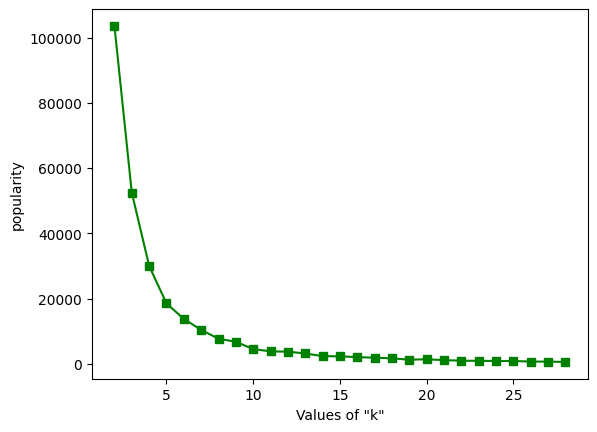

Silhouette Score for k = 2: 0.546
Silhouette Score for k = 3: 0.550
Silhouette Score for k = 4: 0.549
Silhouette Score for k = 5: 0.578
Silhouette Score for k = 6: 0.552
Silhouette Score for k = 7: 0.552
Silhouette Score for k = 8: 0.547
Silhouette Score for k = 9: 0.531
Silhouette Score for k = 10: 0.547
Silhouette Score for k = 11: 0.546
Silhouette Score for k = 12: 0.536
Silhouette Score for k = 13: 0.540
Silhouette Score for k = 14: 0.560
Silhouette Score for k = 15: 0.537
Silhouette Score for k = 16: 0.545
Silhouette Score for k = 17: 0.551
Silhouette Score for k = 18: 0.537
Silhouette Score for k = 19: 0.559
Silhouette Score for k = 20: 0.569
Silhouette Score for k = 21: 0.578
Silhouette Score for k = 22: 0.585
Silhouette Score for k = 23: 0.565
Silhouette Score for k = 24: 0.579
Silhouette Score for k = 25: 0.573
Silhouette Score for k = 26: 0.585
Silhouette Score for k = 27: 0.595
Silhouette Score for k = 28: 0.617


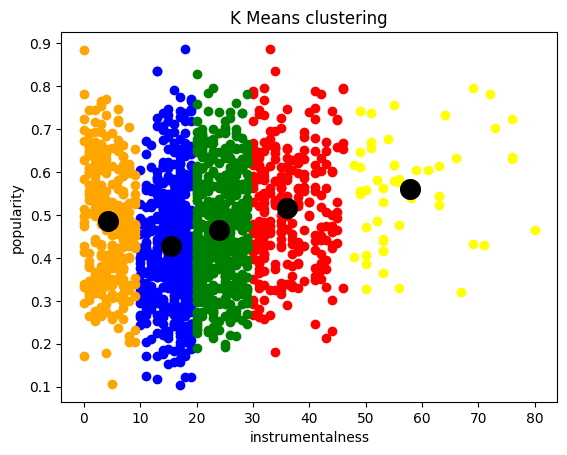

In [ ]:
'''number 1.a) Examine the data initially to identify duplicates, missing values, irrelevant
entries, or outliers. Check for any instances of erroneous entries and
rectify them as needed.
2. Refine the data for further processing based on your findings '''

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
from scipy import stats
from google.colab import drive
import io
from google.colab import files

#drive.mount('/content/drive/')
path='/content/drive/MyDrive/colab_notebooks/rolling_stones_spotify.csv'

data = pd.read_csv(path)


data.head()
data.isnull().sum()

df = pd.DataFrame(data)

data.dropna(inplace=True)
data.isnull().sum()
df.isna().sum()
duplicates = df.duplicated(keep=False)  # keep=False marks all duplicates as True

# Print duplicate rows
print(df[duplicates])

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Print the numerical columns
print(numerical_df)

#get outliers for each column
numerical_df.columns

# Print the numerical columns
print('Numerical columns')
print(numerical_df)

#get number of columns and calculate outliers for each column
len(df.columns)
#df takes 0 as the numeric values before the actual columns, first column is 1
df.iloc[:, 1]

#print highest and lowest allowed values and put these values in remove outliers section
for col in numerical_df:
 highest_allowed= df[col].mean() + 3*df[col].std()
 lowest_allowed= df[col].mean() - 3*df[col].std()
 print("Highest allowed for",col,highest_allowed.round(2))
 print("Lowest allowed for",col,lowest_allowed.round(2))
 # this part of the code find the outliers+ df[(df[col] > 8.80) | (df[col] < 5.11)]

#Remove outliers for the first column
new_df1 = df[(numerical_df.iloc[:, 1] < -11.07) & (numerical_df.iloc[:, 1] > 28.29)]
new_df2 = df[(numerical_df.iloc[:, 2] < -0.43) & (numerical_df.iloc[:, 2] >  0.93)]
new_df3 = df[(numerical_df.iloc[:, 3] < 0.04) & (numerical_df.iloc[:, 3] > 0.89)]
new_df4 = df[(numerical_df.iloc[:, 4] < 0.25) & (numerical_df.iloc[:, 4] > 1.33)]
new_df5 = df[(numerical_df.iloc[:, 5] < -0.66) & (numerical_df.iloc[:, 5] > 0.99)]
new_df6 = df[(numerical_df.iloc[:, 6] < -0.56) & (numerical_df.iloc[:, 6] > 1.54)]
new_df7 = df[(numerical_df.iloc[:, 7] < -15.95) & (numerical_df.iloc[:, 7] >  2.01)]
new_df8 = df[(numerical_df.iloc[:, 8] < -0.09) & (numerical_df.iloc[:, 8] > 0.22)]
new_df9 = df[(numerical_df.iloc[:, 9] < 38.38) & (numerical_df.iloc[:, 9] > 213.78)]
new_df10 = df[(numerical_df.iloc[:, 10] < -0.11) & (numerical_df.iloc[:, 10] > 1.28)]
new_df11 = df[(numerical_df.iloc[:, 11] < -16.49) & (numerical_df.iloc[:, 11] > 58.07)]
new_df12 = df[(numerical_df.iloc[:, 12] < -67263.94) & (numerical_df.iloc[:, 12] > 582736.91)]


# Traverse data frame to detect mixed data types
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

#remove duplicates for the name column if any
tracks = df.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)


'''3.a) Utilize suitable visualizations to identify the two albums that should be
recommended to anyone based on the number of popular songs in each
album'''

from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



'''3.b) b.  Conduct exploratory data analysis to delve into various features of songs,
aiming to identify patterns'''
#ra = df.groupby('album')['popularity'].nlargest(n=1)



# Calculate the mean number of ratings per anime
import statistics


popularity_by_song = df.groupby('name')['popularity'].count()

# Calculate the mean number of ratings per user
mean_popularity_by_song = statistics.mean(popularity_by_song.tolist())
mean_popularity_by_song

import matplotlib.pyplot as plt
import seaborn as sns



filtered_popularity_by_song = popularity_by_song[popularity_by_song >= .75]

most_popular = filtered_popularity_by_song.index.tolist()
print('Most popular songs',most_popular)

musicmat = data.pivot_table(index ='id',
              columns ='name', values ='popularity')

musicmat.head()

df.sort_values('popularity', ascending = False).head(10)


df.head()

'''3.c) Examine the relationship between a song's popularity and various factors,
exploring how this correlation has evolved'''

user_ratingsforsong1 = musicmat['Happy - Live']
user_ratingsforsong2 = musicmat['Monkey Man - Live']

user_ratingsforsong1.head()
# analysing correlation with similar albums
similar_to_1 = musicmat.corrwith(user_ratingsforsong1)
similar_to_2 = musicmat.corrwith(user_ratingsforsong2)

#similar songs with the song1
corr_1 = pd.DataFrame(similar_to_1, columns =['Correlation'])
corr_1.dropna(inplace = True)

corr_1.head()

#similar song as with song2
corr_2 = pd.DataFrame(similar_to_2, columns =['Correlation'])
corr_2.dropna(inplace = True)

corr_2.head()




import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



'''3.b. do a dimensionality reduction'''
dataset_new = df[['popularity',
                       'danceability']].values
limit = int((dataset_new.shape[0]//2)**0.5)

# selecting optimal value of 'k'
# using elbow method

# wcss - within cluster sum of
# squared distances
wcss = {}

for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    wcss[k] = model.inertia_

# plotting the wcss values
# to find out the elbow value
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('popularity')
plt.show()

from sklearn.metrics import silhouette_score



'''4.a)  Use appropriate clustering algoriths
b.  Use appropriate clustering algorithms
c. Define each cluster based on the features '''
# As we see on the plot the right number of clusters is 5.
limit = int((dataset_new.shape[0]//2)**0.5)

# determining number of clusters
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset_new)
    pred = model.predict(dataset_new)
    score = silhouette_score(dataset_new, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

#When printed we can see that the highest value cluster is 28.

model = KMeans(n_clusters=5)

# predicting the clusters
pred = model.fit_predict(dataset_new)

# plotting all the clusters
colours = ['red', 'blue', 'green', 'yellow', 'orange']

for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                c = colours[i])

# plotting the cluster centroids
plt.scatter(model.cluster_centers_[:, 0],
            model.cluster_centers_[:, 1],
            s = 200,  # marker size
            c = 'black')

plt.title('K Means clustering')
plt.xlabel('instrumentalness')
plt.ylabel('popularity')
plt.show()



